<a href="https://colab.research.google.com/github/varadeep09/Titanic_survival_Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [175]:
import pandas as pd

titanic_data = pd.read_csv('train.csv')
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# New Section

In [176]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [177]:
titanic_data.shape

(891, 12)

In [178]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
#remove missing/null values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [181]:
#replacing missing values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [182]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [183]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [184]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [185]:
print(titanic_data['Embarked'].mode()[0])

S


In [186]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [187]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [188]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [189]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [190]:
#visualizing the data
sns.set()

<Axes: ylabel='count'>

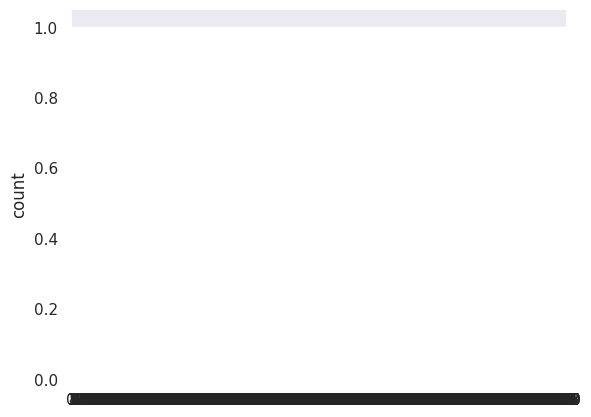

In [191]:
sns.countplot(titanic_data['Survived'])

In [192]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

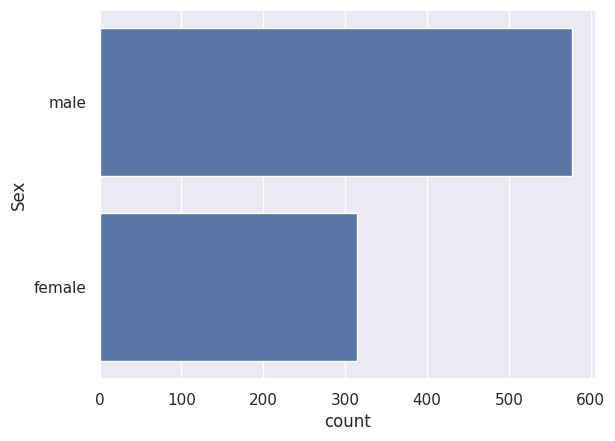

In [193]:
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

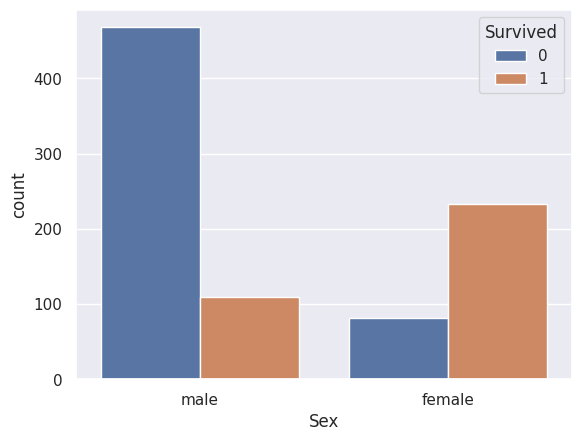

In [194]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

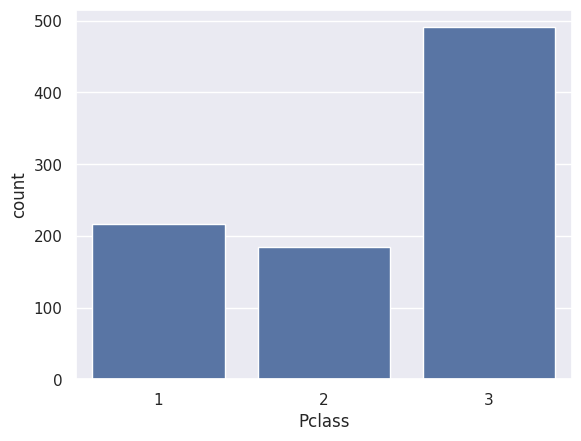

In [195]:
sns.countplot(x='Pclass', data=titanic_data)

In [196]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

In [197]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [198]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [199]:
titanic_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  ...        ...    ...   
886                              Montvila, Rev. Juozas    0  27.000000      0   
887                       Graham, Miss. Margaret Edith    1  19.000000      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  29.699118      1   
889                              Behr, Mr. Karl Howell    0  26.000000      0   
890                                Dooley, Mr. Patrick    0  32.000000      0   

     Parch            Ticket     Fare  Embarked  
0        0         A/5 21171   7.2500         0  
1        0          PC 17599  71.2833         1  
2        0  STON/O2. 3101282   7.9250         0  
3        0            113803  53.1000         0  
4        0            373450   8.0500         0  
..     ...               ...      ...       ...  
886      0            211536  13.0000         0  
887      0            112053  30.0000         0  
888      2        W./C. 6607  23.4500         0  
889      0            111369  30.0000         1  
890      0            370376   7.7500         2  

[891 rows x 11 columns]

In [200]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)
Y = titanic_data['Survived']
print(X)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [201]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state= 2)

In [203]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


LOGISTICAL REGRESSION AND MODEL TRAINING

In [204]:
model = LogisticRegression()


In [205]:
print(X_train.head())

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
30        1    male  40.0      0      0  27.7208        C
10        3  female   4.0      1      1  16.7000        S
873       3    male  47.0      0      0   9.0000        S
182       3    male   9.0      4      2  31.3875        S
876       3    male  20.0      0      0   9.8458        S


In [206]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

In [207]:
#use the train data on logisticregression model
model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [208]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [209]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8103932584269663


In [210]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test = X_test.apply(le.fit_transform)

In [211]:
y_pred = model.predict(X_test)
print(y_pred)


[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [212]:
test_accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy score of test data: ",test_accuracy)

Accuracy score of test data:  0.776536312849162


In [213]:
import joblib
joblib.dump(model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [216]:
! pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok

ngrok.set_auth_token("2dK1y2My7aRffXVfyNGkUaHc6Q0_3P9fQNeFRYVZ3HTgSD25G")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#open ngrok tunnel to flask app using http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#retrieve ngrok's public url here
public_url = ngrok.connect(addr = "5000", proto="http")
print("Public URL:" , public_url)

Public URL: NgrokTunnel: "https://b7e5-34-83-185-231.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML


model = joblib.load('logistic_regression_model.pkl')

app =  Flask(__name__)

@app.route('/')
def home():
  html_form = """"
        <html>
        <head>
        <meta charset="UTF-8">
        <title>Titanic Survival Prediction</title>
        </head>
        <body>
        <h2> Titanic Survival Prediction</h2>
        <form id="predictionForm" method="post" action="/predict">
            <label for="pclass">Pclass:</label>
            <input type="text" id="pclass" name="pclass"><br><br>

            <label for="sex">Sex (0 for male, 1 for female): </label>
            <input type="text" id="sex" name="sex"><br><br>

            <label for="age">Age: </label>
            <input type="text" id="age" name="age"><br><br>

            <label for="sibsp">Sibsp:</label>
            <input type="text" id="sibsp" name="sibsp"><br><br>

            <label for="parch">Parch: </label>
            <input type="text" id="parch" name="parch"><br><br>

            <label for="fare">Fare:</label>
            <input type="text" id="fare" name="fare"><br><br>

            <label for="embarked">Embarked (e for S, 1 for C, 2 for Q):</label>
            <input type="text" id="embarked" name="embarked"><br><br>
            <button type="button" onclick="predictSurvival()">Predict</button>
            </form>
            <p id="predictionResult"></p>
            <script>
             function predictSurvival() {
                var xhr = new XMLHttpRequest();
                var url = "/predict";
                var data = new FormData(document.getElementById("predictionForm"));
                xhr.open("POST", url, true);
                xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                   var response = JSON.parse(xhr.responseText);
                   document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                   }
                   };
        xhr.send(data);
      }
    </script>
  </body>
  </html>
  """
  return html_form

@app.route('/predict', methods=['POST'])
def predict():
  pclass = request.form['pclass']
  sex = request.form['sex']
  age = request.form['age']
  sibsp = request.form['sibsp']
  parch = request.form['parch']
  fare = request.form['fare']
  embarked = request.form['embarked']

  pclass = int(pclass)
  sex = int(sex)
  age = float(age)
  sibsp = int(sibsp)
  parch = int(parch)
  fare = float(fare)
  embarked = int(embarked)

  features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
  prediction = model.predict(features)[0]

  return jsonify({'prediction': int(prediction)})

def run_flask_app():
  app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>[public_url)</p>"))

try:
    run_flask_app()
except KeyboardInterrupt:
    ngrok.kill()








Public URL: NgrokTunnel: "https://ffbc-34-83-185-231.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Mar/2024 16:35:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Mar/2024 16:35:21] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [06/Mar/2024 16:35:55] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [06/Mar/2024 16:38:10] "POST /predict HTTP/1.1" 200 -
